Age of the candidates grouped by parties.

In [21]:
import pandas as pd

all_data = pd.read_excel('alldata.xlsx')
data_grouped_party = all_data.groupby('parti')

age_by_party = pd.DataFrame({
    'mean': round(data_grouped_party['alder'].mean(), 0).astype(int),
    'max': data_grouped_party['alder'].max(),
    'min': data_grouped_party['alder'].min(),
    'std': data_grouped_party['alder'].std().round().astype(int)
})

pd.DataFrame(age_by_party.sort_values(by='mean', ascending=False))

,mean,max,min,std
parti,,,,
Danmarksdemokraterne,51,69,24,10
Kristendemokraterne,49,73,0,15
Løsgænger,48,58,40,9
Nye Borgerlige,48,70,0,14
Venstre,47,69,18,12
Alternativet,46,79,0,16
Dansk Folkeparti,46,75,20,12
Radikale Venstre,45,76,21,12
Moderaterne,44,78,19,14


An overview of the most "confident" candidates, i.e., those with the highest proportion of "strongly agree" or "strongly disagree" responses.

In [22]:
answers_of_candidates = all_data.drop(columns=['alder', 'parti', 'storkreds'])
number_of_questions = len(all_data.drop(columns=['alder', 'parti', 'storkreds', 'navn']).columns)

answers_of_candidates['strong_answers_count']=answers_of_candidates.isin([2, -2]).sum(axis=1)
answers_of_candidates['proportion_strong_to_all']=round(answers_of_candidates.isin([2, -2]).sum(axis=1)/number_of_questions, 2)

strong_candidates = answers_of_candidates[['navn', 'strong_answers_count', 'proportion_strong_to_all']].sort_values(by='strong_answers_count', ascending=False)
pd.DataFrame(strong_candidates).head(10)

,navn,strong_answers_count,proportion_strong_to_all
505,Sarah Nørris,49,1.00
88,Søren Vanting,49,1.00
559,Kim Andkjær Doberck,44,0.90
152,Rashid Ali,43,0.88
44,Mohamed Abdikarim,43,0.88
503,Jan Filbært,42,0.86
151,Elise Bjerkrheim,42,0.86
284,John Bjerg,42,0.86
437,Lone Vase Langballe,42,0.86
359,Frank Sørensen,42,0.86


Differences in responses between candidates, both inter-party and intra-party, along with an explanation of which parties have the most internal disagreements.

530                           \
                                            count      mean       std  min   
parti                                                                        
Alternativet                                 67.0  1.880597  0.477442 -1.0   
Danmarksdemokraterne                         37.0 -0.837838  0.727000 -2.0   
Dansk Folkeparti                             49.0 -0.571429  0.935414 -2.0   
Det Konservative Folkeparti                  98.0 -0.836735  1.081178 -2.0   
Enhedslisten                                 74.0  1.959459  0.258509  0.0   
Frie Grønne, Danmarks Nye Venstrefløjsparti  26.0  1.923077  0.271746  1.0   
Kristendemokraterne                          42.0  0.880952  1.086556 -1.0   
Liberal Alliance                             70.0 -1.142857  0.747667 -2.0   
Løsgænger                                     3.0  0.000000  1.732051 -2.0   
Moderaterne                                  42.0  0.642857  0.983310 -1.0   
Nye Borgerlige                               51.0 -1.098039  0.458471 -2.0   
Radikale Venstre                             67.0  1.402985  0.578915 -1.0   
Socialdemokratiet                            87.0  0.574713  0.960041 -1.0   
Socialistisk Folkeparti                      70.0  1.857143  0.352454  1.0   
Venstre                                      84.0 -0.642857  0.859292 -2.0   

                                                                  531  \
                                             25%  50%  75%  max count   
parti                                                                   
Alternativet                                 2.0  2.0  2.0  2.0  67.0   
Danmarksdemokraterne                        -1.0 -1.0 -1.0  1.0  37.0   
Dansk Folkeparti                            -1.0 -1.0 -1.0  1.0  49.0   
Det Konservative Folkeparti                 -1.0 -1.0 -1.0  2.0  98.0   
Enhedslisten                                 2.0  2.0  2.0  2.0  74.0   
Frie Grønne, Danmarks Nye Venstrefløjsparti  2.0  2.0  2.0  2.0  26.0   
Kristendemokraterne                          1.0  1.0  2.0  2.0  42.0   
Liberal Alliance                            -2.0 -1.0 -1.0  2.0  70.0   
Løsgænger                                   -0.5  1.0  1.0  1.0   3.0   
Moderaterne                                  1.0  1.0  1.0  2.0  42.0   
Nye Borgerlige                              -1.0 -1.0 -1.0  1.0  51.0   
Radikale Venstre                             1.0  1.0  2.0  2.0  67.0   
Socialdemokratiet                            0.0  1.0  1.0  2.0  87.0   
Socialistisk Folkeparti                      2.0  2.0  2.0  2.0  70.0   
Venstre                                     -1.0 -1.0 -1.0  1.0  84.0   

                                                       ...  12a        12b  \
                                                 mean  ...  75%  max count   
parti                                                  ...                   
Alternativet                                 1.134328  ...  1.0  2.0  67.0   
Danmarksdemokraterne                        -1.378378  ...  1.0  2.0  37.0   
Dansk Folkeparti                            -1.081633  ...  1.0  2.0  49.0   
Det Konservative Folkeparti                 -1.877551  ...  1.0  2.0  98.0   
Enhedslisten                                 1.864865  ...  0.0  2.0  74.0   
Frie Grønne, Danmarks Nye Venstrefløjsparti  1.923077  ...  1.0  1.0  26.0   
Kristendemokraterne                         -0.666667  ...  2.0  2.0  42.0   
Liberal Alliance                            -1.971429  ...  2.0  2.0  70.0   
Løsgænger                                   -0.666667  ...  2.0  2.0   3.0   
Moderaterne                                  0.904762  ...  1.0  2.0  42.0   
Nye Borgerlige                              -1.941176  ...  2.0  2.0  51.0   
Radikale Venstre                            -0.895522  ...  1.0  2.0  67.0   
Socialdemokratiet                            0.540230  ...  1.0  2.0  87.0   
Socialistisk Folkeparti                      1.800000  ...  1.0  2.0  70.0   


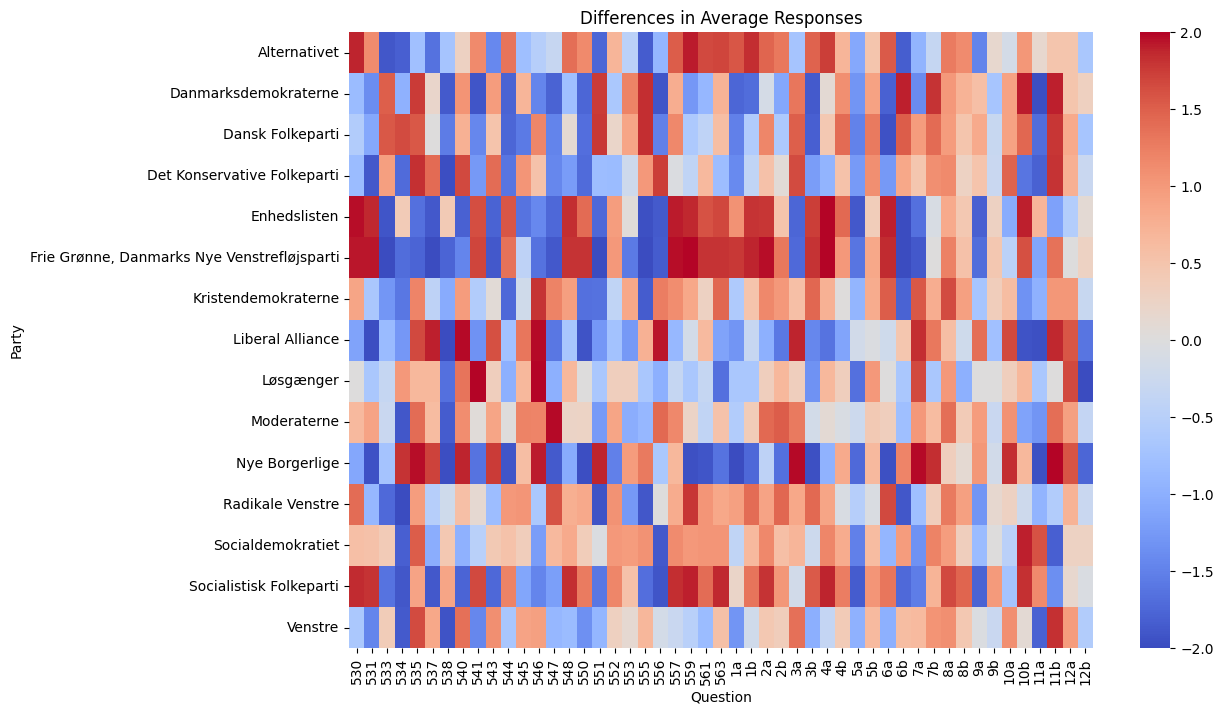

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

df = all_data.drop(columns=['alder', 'navn', 'storkreds'])
df_grouped = df.groupby('parti')

party_stats = df_grouped.describe()
display(party_stats)
#party_stats.to_excel("party_stats.xlsx", index=True)

responses_within_party_avg = df_grouped.mean()

plt.figure(figsize=(12, 8))
sns.heatmap(responses_within_party_avg, cmap='coolwarm', fmt=".2f")
plt.title('Differences in Average Responses')
plt.xlabel('Question')
plt.ylabel('Party')
plt.show()


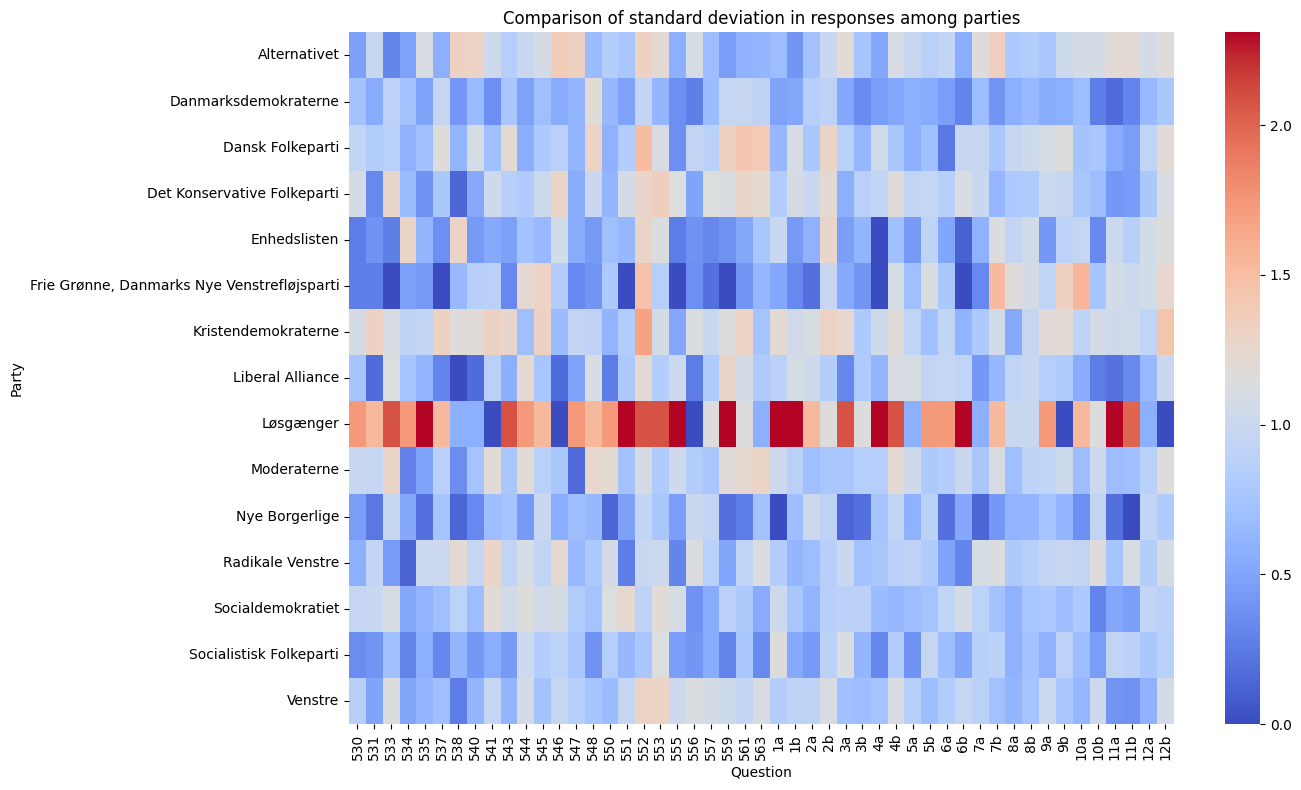

In [24]:
responses_within_party_std = df_grouped.std()

plt.figure(figsize=(14, 8))
sns.heatmap(responses_within_party_std, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Comparison of standard deviation in responses among parties')
plt.xlabel('Question')
plt.ylabel('Party')
plt.tight_layout()
plt.show()

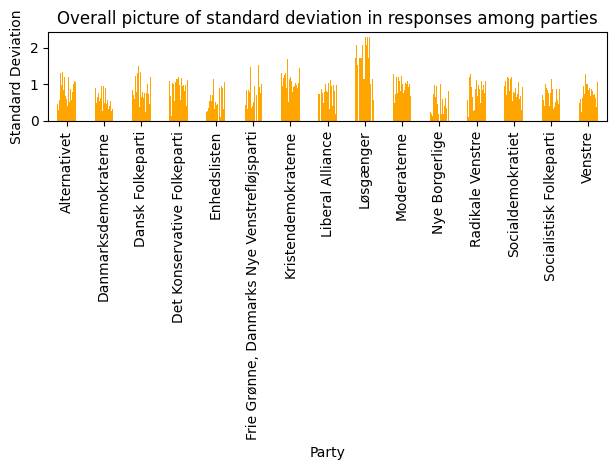

,parti,Mean_Standard_Deviation
0,Løsgænger,1.45
1,Kristendemokraterne,1.03
2,Alternativet,0.91
3,Moderaterne,0.89
4,Dansk Folkeparti,0.89


In [25]:
responses_within_party_std.plot(kind='bar', color='orange')
plt.title('Overall picture of standard deviation in responses among parties')
plt.ylabel('Standard Deviation')
plt.xlabel('Party')
plt.legend().remove()
plt.tight_layout()
plt.show()

parties_with_most_disagreements = round(responses_within_party_std.mean(axis=1).sort_values(ascending=False), 2).head().reset_index().rename(columns={0: 'Mean_Standard_Deviation'})
pd.DataFrame(parties_with_most_disagreements)

**Based on the data and the diagrams shown above, it follows that the party with the most internal disagreements is the "Løsgænger" party. Such a large standard deviation within this grouping may result from the fact that its members are non-affiliated, so they represent different views. Among other parties, the difference in views are not that significant. One party, with the least internal disagreements is Nye Borgerlige with mean standard deviation of 0.56 compared to Løsgænger's 1.45.**

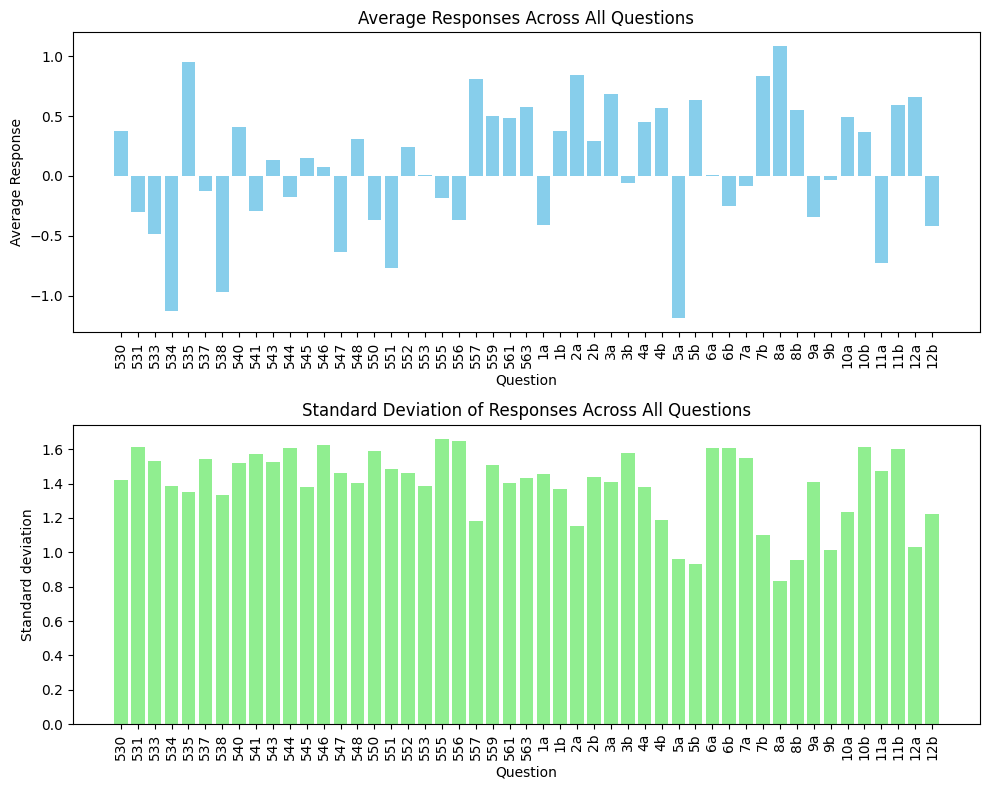

In [26]:
df = all_data.drop(columns=['alder', 'storkreds', 'navn', 'parti'])
df.columns = df.columns.astype(str)

avg_responses_across_all = df.mean()
var_responses_across_all = df.std()

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].bar(avg_responses_across_all.index, avg_responses_across_all, color='skyblue')
axs[0].set_title('Average Responses Across All Questions')
axs[0].set_xlabel('Question')
axs[0].set_ylabel('Average Response')
axs[0].tick_params(axis='x', rotation=90)

axs[1].bar(var_responses_across_all.index, var_responses_across_all, color='lightgreen')
axs[1].set_title('Standard Deviation of Responses Across All Questions')
axs[1].set_xlabel('Question')
axs[1].set_ylabel('Standard deviation')
axs[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

Classification models to predict candidates' party affiliations. Investigate if there are any candidates who seem to be in the "wrong" party based on their political landscape positions. You must use the following three algorithms: **Decision Tree, Random Forrest, and Gradient Boosted Tree**, and **two other** classification algorithms of your choice.

Train accuracy: 0.6492307692307693
Test accuracy: 0.6175115207373272


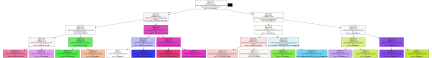

Candidate: 164, Predicted party: Venstre, Actual party: Moderaterne
Candidate: 729, Predicted party: Venstre, Actual party: Danmarksdemokraterne
Candidate: 455, Predicted party: Enhedslisten, Actual party: Socialistisk Folkeparti
Candidate: 357, Predicted party: Alternativet, Actual party: Frie Grønne, Danmarks Nye Venstrefløjsparti
Candidate: 778, Predicted party: Socialistisk Folkeparti, Actual party: Socialdemokratiet
Candidate: 806, Predicted party: Alternativet, Actual party: Frie Grønne, Danmarks Nye Venstrefløjsparti
Candidate: 230, Predicted party: Venstre, Actual party: Alternativet
Candidate: 244, Predicted party: Venstre, Actual party: Danmarksdemokraterne
Candidate: 65, Predicted party: Nye Borgerlige, Actual party: Liberal Alliance
Candidate: 519, Predicted party: Nye Borgerlige, Actual party: Venstre
Candidate: 3, Predicted party: Socialistisk Folkeparti, Actual party: Alternativet
Candidate: 585, Predicted party: Alternativet, Actual party: Radikale Venstre
Candidate: 34

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz
import pydotplus

df = all_data.drop(columns=['alder', 'storkreds', 'navn'])

target = df['parti']

df = df.drop(['parti'], axis='columns')
df.columns = df.columns.astype(str)

X_train, X_test, y_train, y_test = train_test_split(df, target, stratify=target, random_state=42)

# Decision tree classifier
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Train accuracy: {}".format(tree.score(X_train, y_train)))
print("Test accuracy: {}".format(tree.score(X_test, y_test)))

party_names_unique = all_data['parti'].unique()
questions = df.columns.tolist()
dot_data = export_graphviz(tree, out_file=None,
                           class_names=party_names_unique,
                           feature_names=questions,
                           filled=True)

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('"6!"')
gvz_graph = graphviz.Source(pydot_graph.to_string())
display(gvz_graph)

def check_misclassification(candidate, predicted_party, actual_party):
    if actual_party != predicted_party:
        print(f"Candidate: {candidate}, Predicted party: {predicted_party}, Actual party: {actual_party}")

candidates_party_predict = tree.predict(X_test)
number_of_predictions = 0
for candidate, predicted_party, actual_party in zip(X_test.index, candidates_party_predict, y_test):
    check_misclassification(candidate, predicted_party, actual_party)
    number_of_predictions = number_of_predictions+1
print(f"Number of candidates in wrong party: {number_of_predictions}")

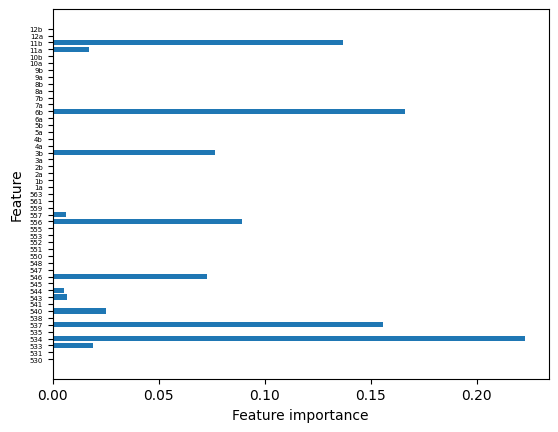

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importance for decision tree classifier
def plot_feature_importances(model):
    n_features = df.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), questions)
    plt.tick_params(axis='y', labelsize=5)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
plot_feature_importances(tree)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Random forest classifier
forest = RandomForestClassifier(n_estimators=100, max_depth=4, max_features=10, random_state=42)
forest.fit(X_train, y_train)

print("Train accuracy: {}".format(forest.score(X_train, y_train)))
print("Test accuracy: {}".format(forest.score(X_test, y_test)))

candidates_party_predict = forest.predict(X_test)
number_of_predictions = 0
for candidate, predicted_party, actual_party in zip(X_test.index, candidates_party_predict, y_test):
    check_misclassification(candidate, predicted_party, actual_party)
    number_of_predictions = number_of_predictions+1
print(f"Number of candidates in wrong party: {number_of_predictions}")

Train accuracy: 0.8861538461538462
Test accuracy: 0.8525345622119815
Candidate: 357, Predicted party: Enhedslisten, Actual party: Frie Grønne, Danmarks Nye Venstrefløjsparti
Candidate: 806, Predicted party: Alternativet, Actual party: Frie Grønne, Danmarks Nye Venstrefløjsparti
Candidate: 65, Predicted party: Nye Borgerlige, Actual party: Liberal Alliance
Candidate: 519, Predicted party: Nye Borgerlige, Actual party: Venstre
Candidate: 3, Predicted party: Socialdemokratiet, Actual party: Alternativet
Candidate: 782, Predicted party: Socialistisk Folkeparti, Actual party: Alternativet
Candidate: 619, Predicted party: Venstre, Actual party: Danmarksdemokraterne
Candidate: 92, Predicted party: Liberal Alliance, Actual party: Det Konservative Folkeparti
Candidate: 42, Predicted party: Alternativet, Actual party: Frie Grønne, Danmarks Nye Venstrefløjsparti
Candidate: 600, Predicted party: Socialistisk Folkeparti, Actual party: Socialdemokratiet
Candidate: 863, Predicted party: Socialistisk 

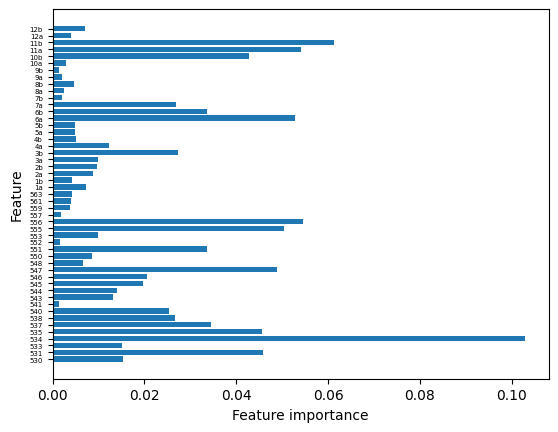

In [30]:
# Feature importance for random forest classifier
plot_feature_importances(forest)

In [31]:
# Gradient boosting classifier
gbt = GradientBoostingClassifier(random_state = 42, n_estimators = 50,
                                max_depth = 2, learning_rate = 0.01)
gbt.fit(X_train, y_train)

print("Train accuracy: {}".format(gbt.score(X_train, y_train)))
print("Test accuracy: {}".format(gbt.score(X_test, y_test)))

candidates_party_predict = gbt.predict(X_test)
number_of_predictions = 0
for candidate, predicted_party, actual_party in zip(X_test.index, candidates_party_predict, y_test):
    check_misclassification(candidate, predicted_party, actual_party)
    number_of_predictions = number_of_predictions+1
print(f"Number of candidates in wrong party: {number_of_predictions}")

Train accuracy: 0.8384615384615385
Test accuracy: 0.783410138248848
Candidate: 357, Predicted party: Enhedslisten, Actual party: Frie Grønne, Danmarks Nye Venstrefløjsparti
Candidate: 806, Predicted party: Alternativet, Actual party: Frie Grønne, Danmarks Nye Venstrefløjsparti
Candidate: 1, Predicted party: Enhedslisten, Actual party: Socialistisk Folkeparti
Candidate: 296, Predicted party: Alternativet, Actual party: Radikale Venstre
Candidate: 3, Predicted party: Socialdemokratiet, Actual party: Alternativet
Candidate: 585, Predicted party: Moderaterne, Actual party: Radikale Venstre
Candidate: 692, Predicted party: Alternativet, Actual party: Radikale Venstre
Candidate: 782, Predicted party: Radikale Venstre, Actual party: Alternativet
Candidate: 619, Predicted party: Venstre, Actual party: Danmarksdemokraterne
Candidate: 42, Predicted party: Alternativet, Actual party: Frie Grønne, Danmarks Nye Venstrefløjsparti
Candidate: 76, Predicted party: Enhedslisten, Actual party: Socialisti

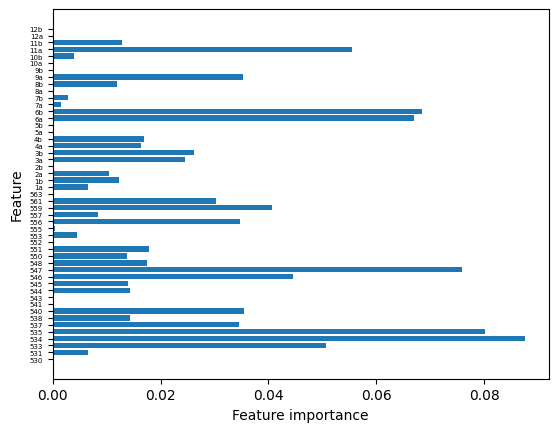

In [32]:
# Feature importance for gradient boosting classifier
plot_feature_importances(gbt)

In [33]:
from sklearn.linear_model import LogisticRegression

# Logistic regression
log_reg = LogisticRegression(C=0.1, random_state=42 ,max_iter=1000)
log_reg.fit(X_train, y_train)

print("Train accuracy: {}".format(log_reg.score(X_train, y_train)))
print("Test accuracy: {}".format(log_reg.score(X_test, y_test)))

candidates_party_predict = log_reg.predict(X_test)
number_of_predictions = 0
for candidate, predicted_party, actual_party in zip(X_test.index, candidates_party_predict, y_test):
    check_misclassification(candidate, predicted_party, actual_party)
    number_of_predictions = number_of_predictions+1
print(f"Number of candidates in wrong party: {number_of_predictions}")

Train accuracy: 0.9815384615384616
Test accuracy: 0.8940092165898618
Candidate: 1, Predicted party: Enhedslisten, Actual party: Socialistisk Folkeparti
Candidate: 519, Predicted party: Nye Borgerlige, Actual party: Venstre
Candidate: 3, Predicted party: Socialdemokratiet, Actual party: Alternativet
Candidate: 782, Predicted party: Radikale Venstre, Actual party: Alternativet
Candidate: 42, Predicted party: Alternativet, Actual party: Frie Grønne, Danmarks Nye Venstrefløjsparti
Candidate: 863, Predicted party: Socialistisk Folkeparti, Actual party: Socialdemokratiet
Candidate: 89, Predicted party: Kristendemokraterne, Actual party: Det Konservative Folkeparti
Candidate: 8, Predicted party: Radikale Venstre, Actual party: Løsgænger
Candidate: 155, Predicted party: Danmarksdemokraterne, Actual party: Dansk Folkeparti
Candidate: 210, Predicted party: Alternativet, Actual party: Radikale Venstre
Candidate: 139, Predicted party: Det Konservative Folkeparti, Actual party: Venstre
Candidate: 6

In [34]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

print("Train accuracy: {}".format(naive_bayes.score(X_train, y_train)))
print("Test accuracy: {}".format(naive_bayes.score(X_test, y_test)))

candidates_party_predict = naive_bayes.predict(X_test)
number_of_predictions = 0
for candidate, predicted_party, actual_party in zip(X_test.index, candidates_party_predict, y_test):
    check_misclassification(candidate, predicted_party, actual_party)
    number_of_predictions = number_of_predictions+1
print(f"Number of candidates in wrong party: {number_of_predictions}")

Train accuracy: 0.8753846153846154
Test accuracy: 0.815668202764977
Candidate: 670, Predicted party: Frie Grønne, Danmarks Nye Venstrefløjsparti, Actual party: Socialistisk Folkeparti
Candidate: 455, Predicted party: Enhedslisten, Actual party: Socialistisk Folkeparti
Candidate: 788, Predicted party: Alternativet, Actual party: Enhedslisten
Candidate: 230, Predicted party: Frie Grønne, Danmarks Nye Venstrefløjsparti, Actual party: Alternativet
Candidate: 131, Predicted party: Frie Grønne, Danmarks Nye Venstrefløjsparti, Actual party: Enhedslisten
Candidate: 519, Predicted party: Dansk Folkeparti, Actual party: Venstre
Candidate: 125, Predicted party: Frie Grønne, Danmarks Nye Venstrefløjsparti, Actual party: Enhedslisten
Candidate: 3, Predicted party: Socialdemokratiet, Actual party: Alternativet
Candidate: 782, Predicted party: Radikale Venstre, Actual party: Alternativet
Candidate: 761, Predicted party: Dansk Folkeparti, Actual party: Nye Borgerlige
Candidate: 92, Predicted party: Li